<a href="https://colab.research.google.com/github/hyesukim1/mmdetection_study/blob/main/mmdetection_faster_rcnn_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MMdetection
현재, 노트북 GPU로 딥러닝 모델을 돌릴수 없어서 코렙을 이용해 faster rcnn demo 진행>사용 가능 확인

단점: 기본적인 환경 설정 시간이 오래 걸림

(물론 로컬에 cuda, cudnn등 환경 설정 하는게 더 오래 걸리지만) 

코렙 기준 필요한 라이브러리 설치할때 gpu로 사용했음에도 20분 정도 걸린것 같음


In [1]:
pip install mmcv-full


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 575 kB 38.6 MB/s 
     |████████████████████████████████| 190 kB 49.4 MB/s 
  Created wheel for mmcv-full: filename=mmcv_full-1.6.2-cp37-cp37m-linux_x86_64.whl size=24338933 sha256=c6ef00e49c1c600397e9f03117086e5fd7d3b6f28039a57029dad4225ff55c4e
  Stored in directory: /root/.cache/pip/wheels/51/0a/2c/990e1866b4c28e9a70ae3a0a304eeaf4711e85a87c647b8b79
Successfully built mmcv-full


In [2]:
pip install mmdet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 33.4 MB/s 


In [3]:
!git clone https://github.com/open-mmlab/mmdetection.git

Cloning into 'mmdetection'...
remote: Enumerating objects: 31796, done.
remote: Counting objects: 100% (372/372), done.
remote: Compressing objects: 100% (288/288), done.
remote: Total 31796 (delta 120), reused 273 (delta 84), pack-reused 31424
Receiving objects: 100% (31796/31796), 40.98 MiB | 17.15 MiB/s, done.
Resolving deltas: 100% (22745/22745), done.


In [4]:
cd mmdetection

/content/mmdetection


In [5]:
pip install -r requirements/build.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
pip install -v -e .

Using pip 21.1.3 from /usr/local/lib/python3.7/dist-packages/pip (python 3.7)
Value for scheme.platlib does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local/lib/python3.7/dist-packages
sysconfig: /usr/lib/python3.7/site-packages
Value for scheme.purelib does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local/lib/python3.7/dist-packages
sysconfig: /usr/lib/python3.7/site-packages
Value for scheme.headers does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local/include/python3.7/UNKNOWN
sysconfig: /usr/include/python3.7m/UNKNOWN
Value for scheme.scripts does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local/bin
sysconfig: /usr/bin
Value for scheme.data does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local
sysconfig: /usr
Additional context:
user = False
home

In [7]:
mkdir checkpoints

In [8]:
!wget ./mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth  http://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth

--2022-10-08 08:03:16--  http://./mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth
Resolving . (.)... failed: No address associated with hostname.
wget: unable to resolve host address ‘.’
--2022-10-08 08:03:16--  http://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.74.197.92
Connecting to download.openmmlab.com (download.openmmlab.com)|47.74.197.92|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 167287506 (160M) [application/octet-stream]
Saving to: ‘faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth’

faster_rcnn_r50_fpn 100%[===================>] 159.54M  17.4MB/s    in 9.9s    

2022-10-08 08:03:28 (16.1 MB/s) - ‘faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth’ saved [167287506/167287506]

FINISHED --2022-10-08 08:03:28--
Total wall clock time: 12s
Downloaded: 1 files, 160M in 9.9s (16.1

In [9]:
from mmdet.apis import init_detector, inference_detector, show_result_pyplot

In [10]:
config_file = '/content/mmdetection/configs/faster_rcnn/faster_rcnn_r50_fpn_1x_coco.py'
checkpoint_file = '/content/mmdetection/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth'

In [11]:
model = init_detector(config_file, checkpoint_file, device='cuda:0')

load checkpoint from local path: /content/mmdetection/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth


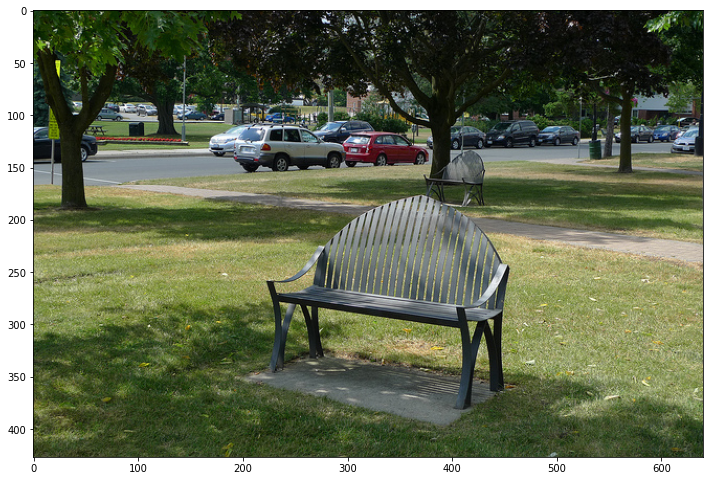

In [12]:
import cv2
import matplotlib.pyplot as plt
img = '/content/mmdetection/demo/demo.jpg'

img_arr  = cv2.cvtColor(cv2.imread(img), cv2.COLOR_BGR2RGB)
plt.figure(figsize=(12, 12))
plt.imshow(img_arr)

In [13]:
results = inference_detector(model, img)

/content/mmdetection/mmdet/datasets/utils.py:70: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  'data pipeline in your config file.', UserWarning)


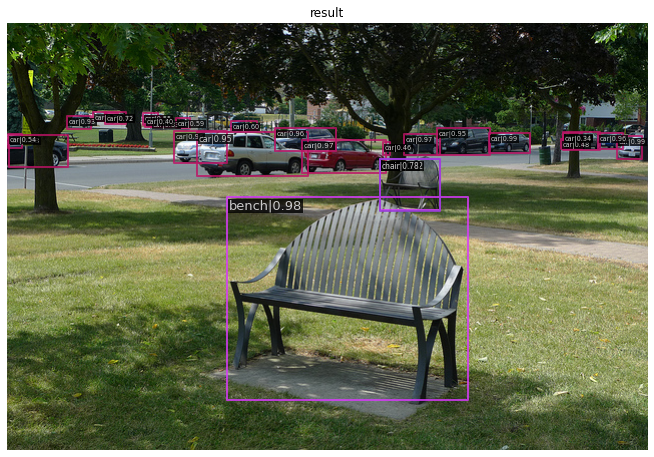

In [14]:
show_result_pyplot(model, img, results)